In [23]:
import numpy as np
import pandas as pd
import urllib.request
import math
from bs4 import BeautifulSoup as bs
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import numpy as np
from scipy.optimize import curve_fit

#### importing the relevant data and integrating it into a pandas DataFrame

In [3]:
with urllib.request.urlopen("https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin") as website:
    url_file = website.read()
    html_file1 = url_file.decode("utf8")
    html_file2 = bs(html_file1,'lxml')

In [4]:
Borough = pd.DataFrame({"Borough":[]})
Population = pd.DataFrame({"Population":[]})
Area = pd.DataFrame({"Area":[]})
Density = pd.DataFrame({"Density":[]})

borough_data = html_file2.tbody.text.splitlines()
borough_data.remove('Borough')
borough_data.remove('Population 31 March 2010')
borough_data.remove('Area in km²')
borough_data.remove('Density per km²')
borough_data.remove('Map')

clean_borough_data = []
for element in borough_data:
    if len(element) != 0:
        clean_borough_data.append(element)
        
counter = 0
for element in clean_borough_data:
    if counter % 4 == 0:
        element = pd.DataFrame({"Borough":[element]})
        Borough = Borough.append(element)
    if counter % 4 == 1:
        element = pd.DataFrame({"Population":[element]})
        Population = Population.append(element)
    if counter % 4 == 2:
        element = pd.DataFrame({"Area":[element]})
        Area = Area.append(element)
    if counter % 4 == 3:
        element = pd.DataFrame({"Density":[element]})
        Density = Density.append(element)
    counter = counter + 1

data = pd.concat([Borough,Population,Area,Density],axis=1)

for i in range(len(data.iloc[:,1].tolist())):
    data.iloc[i,1] = float(data.iloc[i,1].replace(',',''))
    data.iloc[i,2] = float(data.iloc[i,2])
    data.iloc[i,3] = float(data.iloc[i,3].replace(',',''))
data = data.reset_index(drop=True)

#### further data import and cleaning of the relevant data

In [5]:
longlat = pd.DataFrame({"Latitude":[52.500000,52.499567,52.534306,52.522935,52.530644,52.483333,52.592879,52.566667,52.534080,52.430884,52.472160,52.450000],
                        "Longitude": [13.283333,13.431419,13.502326,13.576597,13.383068,13.450000,13.431700,13.333333,13.181716,13.192662,13.370287,13.566667]})
data = pd.concat([data,longlat],axis=1)

In [50]:
Prices = [11.23,11.91,9.10,7.34,11.83,9.83,10.06,8.62,7.95,9.80,9.70,8.98]
Taxes = [2921,1381,284,242,1672,541,739,2150,398,1502,929,428]
Prices = np.asarray(Prices)
Taxes = np.asarray(Taxes)

#### for building a model, the prices are fitted over the average income taxes payed

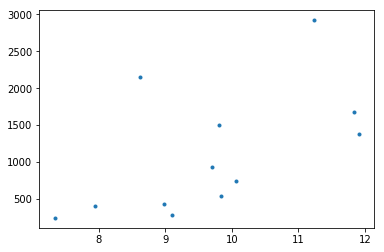

In [51]:
plt.plot(Prices,Taxes,'.')

In [52]:
def expo(x, a, b):
    return a * np.exp(x) + b

In [53]:
popt, pcov = curve_fit(expo, Prices, Taxes)

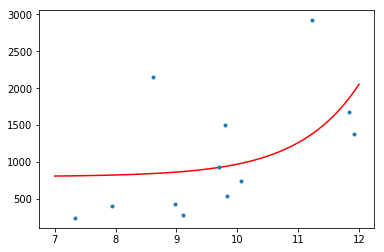

In [62]:
xfine = np.linspace(7., 12., 100)
plt.plot(xfine, expo(xfine, popt[0], popt[1]), 'r-')
plt.plot(Prices,Taxes,'.')

#### location data is obtained and a rough exploratory data analysis is performed

In [7]:
address = 'Berlin, DE'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))
data

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


,Borough,Population,Area,Density,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,52.500000,13.283333
1,Friedrichshain-Kreuzberg,268225,20.16,13187,52.499567,13.431419
2,Lichtenberg,259881,52.29,4952,52.534306,13.502326
3,Marzahn-Hellersdorf,248264,61.74,4046,52.522935,13.576597
4,Mitte,332919,39.47,8272,52.530644,13.383068
5,Neukölln,310283,44.93,6804,52.483333,13.450000
6,Pankow,366441,103.01,3476,52.592879,13.431700
7,Reinickendorf,240454,89.46,2712,52.566667,13.333333
8,Spandau,223962,91.91,2441,52.534080,13.181716
9,Steglitz-Zehlendorf,293989,102.5,2818,52.430884,13.192662


#### plotting the different borough location on a map of Berlin

In [8]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(data['Latitude'], data['Longitude'], data['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [9]:
CLIENT_ID = '4EUVVAV2J3UK3KFZFPO4RU5ISK3HXZ0UAL2YMJH0ELMSUXCL' # your Foursquare ID
CLIENT_SECRET = 'C31ALBIDB1D3DHBT5T4IXDPDHNJNMSJ3AYQAL1KCQCZPPWCQ' # your Foursquare Secret
VERSION = '20190409' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4EUVVAV2J3UK3KFZFPO4RU5ISK3HXZ0UAL2YMJH0ELMSUXCL
CLIENT_SECRET:C31ALBIDB1D3DHBT5T4IXDPDHNJNMSJ3AYQAL1KCQCZPPWCQ


#### finding the most popular venues in each borough

In [10]:
radius = 500 # define radius
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [211]:
berlin_venues = getNearbyVenues(names=data['Borough'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )

Charlottenburg-Wilmersdorf
Friedrichshain-Kreuzberg
Lichtenberg
Marzahn-Hellersdorf
Mitte
Neukölln
Pankow
Reinickendorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schöneberg
Treptow-Köpenick


In [212]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Borough'] = berlin_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_grouped = berlin_onehot.groupby('Borough').mean().reset_index()

#### exploring the most popular venues by integrating the data from Foursquare into a table of most common venues

In [219]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Borough'] = berlin_grouped['Borough']

for ind in np.arange(berlin_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Automotive Shop,Pet Store,Intersection,Food & Drink Shop,Rest Area,Light Rail Station,Hotel,Steakhouse,Scenic Lookout,Park
1,Friedrichshain-Kreuzberg,Bar,Café,German Restaurant,Vietnamese Restaurant,Turkish Restaurant,Cocktail Bar,Italian Restaurant,Breakfast Spot,Korean Restaurant,Middle Eastern Restaurant
2,Lichtenberg,Fast Food Restaurant,Tram Station,Furniture / Home Store,Pool Hall,Supermarket,Hardware Store,Soccer Field,Drugstore,Falafel Restaurant,Farmers Market
3,Marzahn-Hellersdorf,Stadium,Playground,Athletics & Sports,Soccer Field,Furniture / Home Store,Doner Restaurant,Drugstore,Eastern European Restaurant,Falafel Restaurant,Farmers Market
4,Mitte,Hotel,Coffee Shop,Café,Italian Restaurant,Bakery,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Drugstore,Plaza,Gym / Fitness Center


#### clustering the boroughs according to their most common venue types

In [214]:
# set number of clusters
kclusters = 8

berlin_grouped_clustering = berlin_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 7, 5, 1, 6, 4, 0, 2, 1])

In [215]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = data
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighbourhoods_venues_sorted.set_index('Borough'), on='Borough')

In [216]:
berlin_merged = berlin_merged.dropna()

#### creating a map of berlin and its boroughs, clustered by the aforementioned topics

In [217]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Borough'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters